# Basic image processing in Python 3

First of all we need to import misc module from scipy which has the builtin funcitons for opening images. 
Numpy is a numerical computing and linear algebra library which we use to process digital images as matrices. Matplotlib provies several methods for ploting which we will use for displaying images. 


In [19]:
#from scipy import misc (depricatd)
from imageio import imread
import numpy as np
from matplotlib.pyplot import imshow


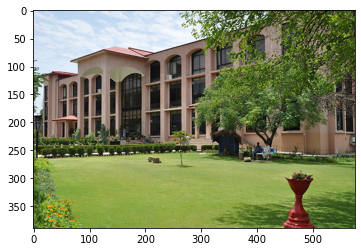

In [20]:
# enables the inline mode for matplotlib so that it won't open another window for showing images.
%matplotlib inline
# this reads the given image and stores it as a matrix (numpy array)
im = imread('ciit.jpg') 
# this is a matplotlib function that displays a numpy array as an image.
imshow(im)

In [21]:
print(type(im))
print(im.shape)
print(im)

<class 'imageio.core.util.Array'>
(389, 575, 3)
[[[217 229 245]
  [215 228 244]
  [209 225 241]
  ...
  [ 31  53   6]
  [ 30  54   6]
  [ 35  59   7]]

 [[210 226 241]
  [216 228 244]
  [215 227 243]
  ...
  [ 36  61   4]
  [ 38  64   3]
  [ 31  50   5]]

 [[207 222 241]
  [212 228 243]
  [217 229 243]
  ...
  [ 28  55   0]
  [ 27  50   8]
  [ 15  17   6]]

 ...

 [[139 158 128]
  [106 133  64]
  [ 36  77   0]
  ...
  [ 97 143  45]
  [101 142  63]
  [ 72 119  41]]

 [[123 146 100]
  [100 133  46]
  [ 61  91  21]
  ...
  [115 160  65]
  [131 174  85]
  [ 91 134  44]]

 [[110 140  78]
  [104 138  52]
  [ 70  97  28]
  ...
  [ 66 108  34]
  [ 96 138  54]
  [105 145  56]]]


In [4]:
print(im.shape)

(389, 575, 3)


In [22]:
print(im[0][0]) # 0 row, 0 col
type(im[0][0])
#np.int(np.average(im[0][0]))


[217 229 245]


imageio.core.util.Array

## RGB to Grayscale Conversion

There are many ways to convert RGB to Grayscale. Here’s we’ll do two of those, a simple Average and a Weighted Average.
Simple Average

This formula is very simple:
$$ i = \frac{r + g + b}{3} $$

In [23]:
def average(pixel):
    return (pixel[0] + pixel[1] + pixel[2]) / 3

#OR, even more simple, use numpy's average
#np.average(pixel)

Using this function to convert an image

In [24]:
print(im.shape[1])
np.zeros((3,4))

575


array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [25]:
gray = np.zeros((im.shape[0], im.shape[1])) 
# initialize a new 2D numpy array

for row in range(len(im)):
   for col in range(len(im[row])):
        # gray[row][col] = average(im[row][col])
        gray[row][col] = np.average(im[row][col])


(389, 575)

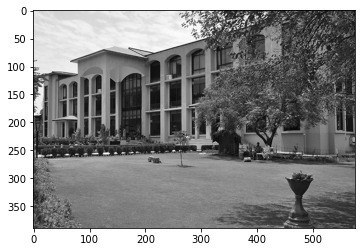

In [26]:
imshow(gray,cmap='gray')
gray.shape

In [10]:
# incrasing pixel values by 25%

gray2 =gray * 2.25

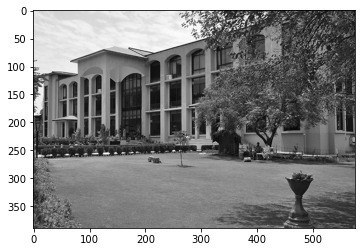

In [11]:
imshow(gray2,cmap='gray')

In [27]:
im.shape

(389, 575, 3)

In [28]:
gray.shape

(389, 575)

# performing image inversion

$$ S(x,y) = 256 - R(x,y) $$

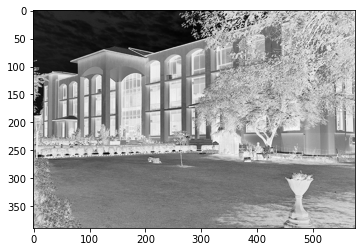

In [29]:
neg = 255 - gray
imshow(neg,cmap="gray")

In [30]:
print(gray[0][0])
print(neg[0][0])


230.33333333333334
24.666666666666657


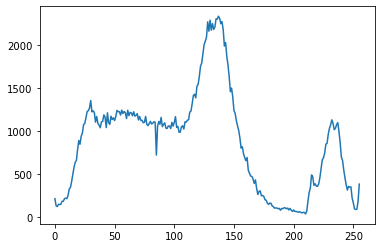

In [31]:
from matplotlib import pyplot as plt 
hist = np.histogram(gray,256)
plt.plot(hist[0])


[[-1 -1 -1]
 [ 2  2  2]
 [-1 -1 -1]]


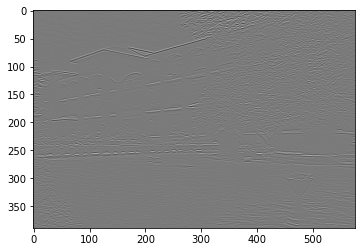

In [33]:
from scipy import ndimage
w = np.array([[-1, -1, -1],[2, 2, 2],[-1, -1 , -1]])
print(w)
b = ndimage.filters.convolve(gray, w)
imshow(b,cmap='gray')

[[-1  2 -1]
 [-1  2 -1]
 [-1  2 -1]]


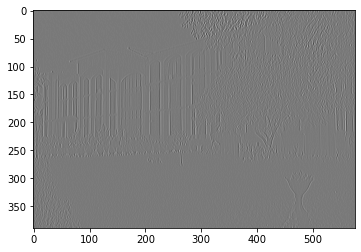

In [34]:
w2 = np.array([[-1, 2, -1],[-1, 2, -1],[-1, 2 , -1]])
print(w2)
c = ndimage.filters.convolve(gray, w2)
imshow(c,cmap='gray')